In [5]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import VarianceThreshold

In [6]:
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
import torch.optim.lr_scheduler as lr_scheduler
from sklearn.metrics import r2_score, mean_squared_error

In [7]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import time
from sklearn.metrics import mean_absolute_error
import seaborn as sns

In [8]:
path_out = r'F:\Codes\joint attention\Nano-particle\output_new_new'

file_path_features_norm = os.path.join(path_out , 'features_normalized_35.npy')
file_path_labels = os.path.join(path_out , 'label_r_avg_raw.npy')
file_path_features_original = os.path.join(path_out , 'features_raw_35.npy')

with open( file_path_features_original , 'rb') as f:
    features_orig = np.load(f)
with open( file_path_labels , 'rb') as f:
    labels = np.load(f)
with open( file_path_features_norm , 'rb') as f:
    features_norm = np.load(f)

print(features_orig.shape)
print(labels.shape)
print(features_norm.shape)

(3999, 35)
(3999, 1)
(3999, 35)


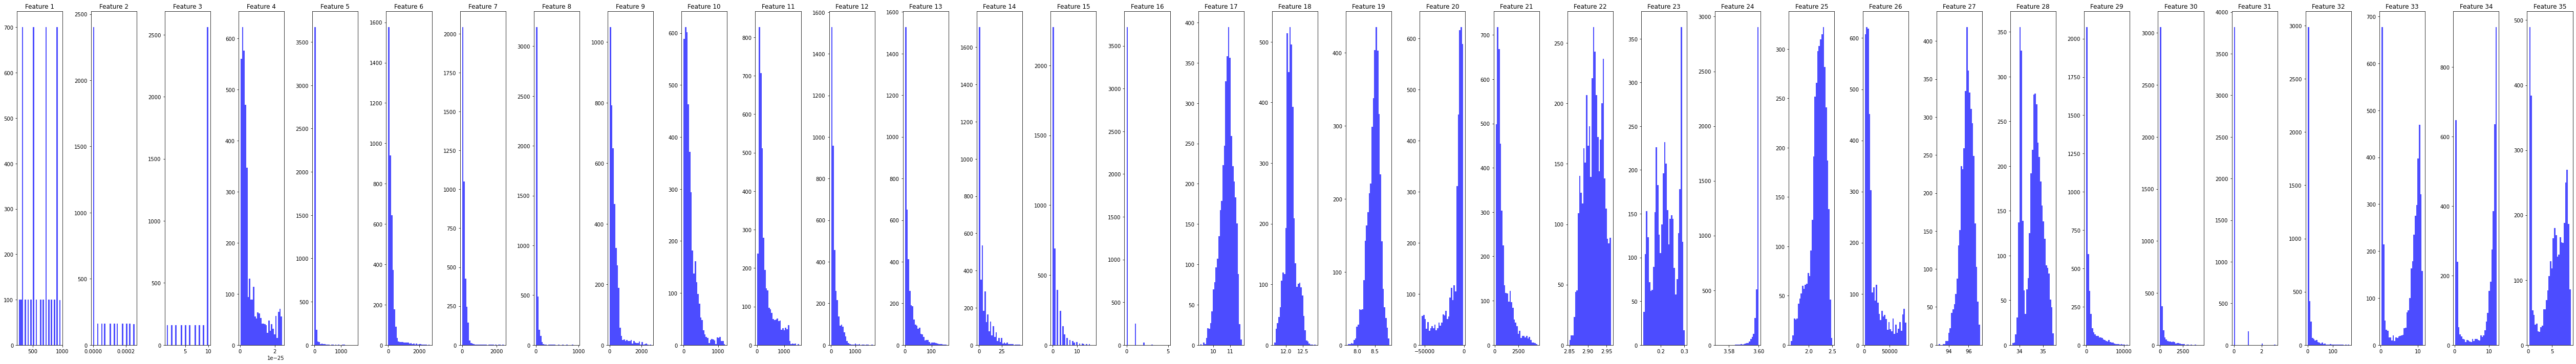

In [11]:
data = features_orig
fig, axs = plt.subplots(nrows=1, ncols=35, figsize=(70, 10))
for i in range(35):
    axs[i].hist(data[:, i], bins=30, color='blue', alpha=0.7)
    axs[i].set_title(f'Feature {i+1}')
plt.tight_layout()
plt.show()

In [13]:
# Split data into train and test sets
features_train, features_test, labels_train, labels_test = train_test_split(features_orig, labels, test_size=0.2, random_state=42)

print(f"features train shape: {features_train.shape}")
print(f"features test shape: {features_test.shape}") # tmp 
print(f"labels train shape: {labels_train.shape}")
print(f"labes test shape: {labels_test.shape}") # tmp

print(f"features train type: {type(features_train)}")
print(f"features test type: {type(features_test)}")
print(f"labels train type: {type(labels_train)}")
print(f"labes test type: {type(labels_test)}")

#test set again split into actual test and validation sets
features_validation, features_test, labels_validation, labels_test = train_test_split(features_test, labels_test, test_size=0.5, random_state=42)

print(f"features validation shape: {features_validation.shape}")
print(f"features test shape: {features_test.shape}")
print(f"labels validation shape: {labels_validation.shape}")
print(f"labes test shape: {labels_test.shape}")

print(f"features validation type: {type(features_validation)}")
print(f"features test type: {type(features_test)}")
print(f"labels validation type: {type(labels_validation)}")
print(f"labes test type: {type(labels_test)}")

features train shape: (3199, 35)
features test shape: (800, 35)
labels train shape: (3199, 1)
labes test shape: (800, 1)
features train type: <class 'numpy.ndarray'>
features test type: <class 'numpy.ndarray'>
labels train type: <class 'numpy.ndarray'>
labes test type: <class 'numpy.ndarray'>
features validation shape: (400, 35)
features test shape: (400, 35)
labels validation shape: (400, 1)
labes test shape: (400, 1)
features validation type: <class 'numpy.ndarray'>
features test type: <class 'numpy.ndarray'>
labels validation type: <class 'numpy.ndarray'>
labes test type: <class 'numpy.ndarray'>


In [14]:
df_train_original = pd.DataFrame(features_train, columns=[ f'feature_{i}' for i in range(35)])
df_test_original = pd.DataFrame(features_test, columns=[ f'feature_{i}' for i in range(35)])
df_validation_original = pd.DataFrame(features_validation, columns=[ f'feature_{i}' for i in range(35)])

In [19]:
tmp_vals = [273.0, 303.0, 323.0, 373.0, 423.0, 473.0, 523.0, 573.0, 623.0, 673.0, 723.0, 773.0, 823.0, 873.0, 923.0, 973.0]

## Training dataset

In [18]:
df_train_original.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34
0,523.0,0.0,10.0,3.280000e-26,90.0,287.0,50.0,29.0,395.0,123.0,...,10518.0,96.3152,34.826887,817.0,259.0,0.0,10.0,10.3711,11.6705,7.6603
1,323.0,0.0,10.0,2.640000e-26,0.0,374.0,109.0,32.0,371.0,83.0,...,8366.0,96.3943,34.973728,658.0,224.0,0.0,14.0,10.3831,11.6369,8.3585
2,923.0,0.0,10.0,3.450000e-26,0.0,301.0,62.0,2.0,349.0,203.0,...,11168.0,95.7675,34.479458,201.0,74.0,0.0,2.0,8.3825,10.1754,5.0698
3,923.0,0.0,10.0,3.140000e-26,0.0,137.0,51.0,4.0,221.0,169.0,...,10097.0,95.6781,34.553846,190.0,13.0,0.0,0.0,7.6697,9.8843,3.5023
4,923.0,0.0,10.0,5.490000e-27,0.0,5.0,26.0,4.0,20.0,61.0,...,1602.0,94.1036,33.967818,0.0,0.0,0.0,0.0,0.7901,0.8741,0.7238


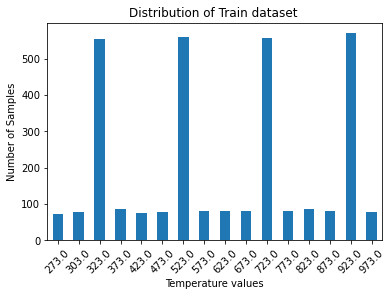

In [38]:
value_counts = df_train_original['feature_0'].value_counts()
value_counts = value_counts.reindex(tmp_vals)
# Plot the distribution as a bar plot
value_counts.plot(kind='bar')
plt.title('Distribution of Train dataset ')
plt.xlabel('Temperature values')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)  # Rotate labels to make them readable
plt.show()

In [39]:
print(value_counts)

273.0     73
303.0     77
323.0    555
373.0     87
423.0     76
473.0     77
523.0    560
573.0     80
623.0     81
673.0     80
723.0    558
773.0     81
823.0     86
873.0     80
923.0    570
973.0     78
Name: feature_0, dtype: int64


## Test set

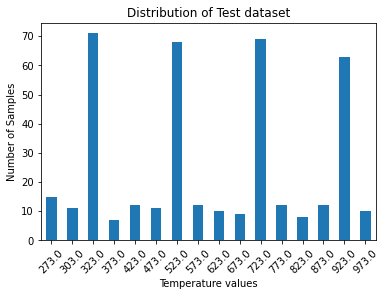

In [40]:
value_counts = df_test_original['feature_0'].value_counts()
value_counts = value_counts.reindex(tmp_vals)

# Plot the distribution as a bar plot
value_counts.plot(kind='bar')
plt.title('Distribution of Test dataset')
plt.xlabel('Temperature values')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)  # Rotate labels to make them readable
plt.show()

In [41]:
print(value_counts)

273.0    15
303.0    11
323.0    71
373.0     7
423.0    12
473.0    11
523.0    68
573.0    12
623.0    10
673.0     9
723.0    69
773.0    12
823.0     8
873.0    12
923.0    63
973.0    10
Name: feature_0, dtype: int64


## Validation dataset

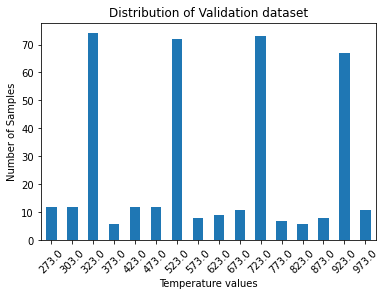

In [42]:
value_counts = df_validation_original['feature_0'].value_counts()
value_counts = value_counts.reindex(tmp_vals)

# Plot the distribution as a bar plot
value_counts.plot(kind='bar')
plt.title('Distribution of Validation dataset')
plt.xlabel('Temperature values')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)  # Rotate labels to make them readable
plt.show()

In [43]:
print(value_counts)

273.0    12
303.0    12
323.0    74
373.0     6
423.0    12
473.0    12
523.0    72
573.0     8
623.0     9
673.0    11
723.0    73
773.0     7
823.0     6
873.0     8
923.0    67
973.0    11
Name: feature_0, dtype: int64


### This can be extended to include growth rate based distribution as well as time based distributions. What are we trying to say using this??

## End of code